In [2]:
def GenerateIndividuals(N,m, corr): 
    RSig = np.array([-1, 1])
    RAlt = np.array([-1, 1])
    means = [RSig.mean(), RAlt.mean()] 
    stds = [RSig.std() / 3, RAlt.std() / 3]
    #stds = [0.1,0.1]
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
            [stds[0]*stds[1]*corr,           stds[1]**2]] 
    Sample = np.random.multivariate_normal(means, covs, m*N).T
    Sample=np.transpose(Sample)
    np.random.shuffle(Sample)
    #plt.scatter(Sample[:,0], Sample[:,1])
    #print Sample
    #####This is to have mean ta 0 - is it necessary? 
    #SampMean=np.mean(Sample,0)    
    #Sample[:,0]=Sample[:,0]-SampMean[0]
    #Sample[:,1]=Sample[:,1]-SampMean[1]
    #print np.mean(Sample)
    #
    Genotypes=np.reshape(Sample,(m,N, 2))
    #Genotypes=np.random.rand(m,N,2)  #this is uniform between 0 and 1, should be gaussian?
    #Genotypes=np.reshape(range(m*N*2),(m,N, 2))
    # print Genotypes
    
    return Genotypes


def CalcPhenotypes(Genotypes, Psi, m, N):
    Phenotypes=np.zeros((m, N,2))
    for i in range(m):
        SigT=0
        #AltT=0
        for j in range(N):
            SigT=SigT+Genotypes[i,j,0]
            #AltT=AltT+Genotypes[i,j,1]
        for j in range(N):
            Phenotypes[i,j,0]=Genotypes[i,j,0]  #Signalling trait
            Phenotypes[i,j,1]=Genotypes[i,j,1]+(SigT-Genotypes[i,j,0])*Psi  #Altruistic trait
    return Phenotypes


def CalcFitness(Genotypes, Phenotypes, Bs, Bn, m , N, Psi, Alpha):
    Fitness=np.zeros((m, N))
    Fitness2=np.zeros((m, N))
    
    for i in range(m):
        SigTG=0
        AltT=0
        AltTG=0
        for j in range(N):
            SigTG=SigTG+Genotypes[i,j,0]
            AltTG=AltTG+Genotypes[i,j,1]
            AltT=AltT+Phenotypes[i,j,1]  #counting the altruistic trait in the group
        for j in range(N):
            Fitness[i,j]=Alpha+Phenotypes[i,j,1]*Bn+(AltT-Phenotypes[i,j,1])*Bs  #Altristic trait fitness contribution
            Fitness2[i,j]=Alpha+(N-1)*Bs*Psi*Genotypes[i,j,0]+Bn*Genotypes[i,j,1]+(Bn*Psi+(N-2)*Bs*Psi)*(SigTG-Genotypes[i,j,0])+Bs*(AltTG-Genotypes[i,j,1])
        #print SigTG
        #print AltTG
    #print Fitness
    #print Genotypes
    
    
    return Fitness, Fitness2


def DoSelection(Genotypes, Fitness):
    #SumFitness=np.sum(Fitness)
    NormFit=Fitness/np.sum(Fitness)
    AllFitness=np.reshape(NormFit,(N*m,1))
    AllFitness=AllFitness.flatten()
    Chosen=np.random.choice(N*m, N*m, p=AllFitness)
    return Chosen

def ResponseToSelection(Chosen, Genotypes):
    AllGenotypes=np.reshape(Genotypes,(N*m, 2))
    NewGeneration=np.zeros((N*m,2))
    for i in range(N*m):
        NewGeneration[i]=AllGenotypes[Chosen[i]]
    Response=np.sum(NewGeneration,0)-np.sum(AllGenotypes,0)
    Response =Response/(N*m)
    return Response, NewGeneration


def MakeGroups(Genotypes, m, N):
    np.random.shuffle(Genotypes)
    NewGenotypes=np.reshape(Genotypes,(m,N, 2))
    return NewGenotypes
    
    



def ResponseFromPsi(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    PsiRange=np.linspace(0,Psi,11)
    Means=[]
    STDs=[]
    for i in PsiRange:
        Psi=i
        print Psi
        [MeanRTS, STDRTS]=MeanResponse(Corr, Bs, Bn, Psi, m, N, T, Alpha )
        Means.append(MeanRTS)
        STDs.append(STDRTS)

    MeansArray=np.asarray(Means)
    plt.plot(PsiRange, MeansArray[:,0],'b')
    plt.plot(PsiRange, MeansArray[:,1],'r')
    plt.title('Mean response from Psi')
    plt.show()
    print MeansArray


def ResponseFromBetaN(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    BetaNRange=np.linspace(0,Bn,11)
    Means=[]
    STDs=[]
    for i in BetaNRange:
        Bn=i
        print Bn
        [MeanRTS, STDRTS, MeanPhenR, STDPhenR]=MeanResponse(Corr, Bs, Bn, Psi, m, N, T, Alpha )
        Means.append(MeanRTS)
        STDs.append(STDRTS)
        PMeans.append(MeanPhenR)
        STDsP.append(STDPhenR)

    MeansArray=np.asarray(Means)
    plt.plot(BetaNRange, MeansArray[:,0],'b')
    plt.plot(BetaNRange, MeansArray[:,1],'r')
    plt.title('Mean response from Bn')
    plt.show()
    print MeansArray
    
    
    
def ResponseFromBetaS(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    BetaSRange=np.linspace(0,Bs,11)
    Means=[]
    STDs=[]
    for i in BetaSRange:
        Bs=i
        print Bs
        [MeanRTS, STDRTS]=MeanResponse(Corr, Bs, Bn, Psi, m, N, T, Alpha )
        Means.append(MeanRTS)
        STDs.append(STDRTS)

    MeansArray=np.asarray(Means)
    plt.plot(BetaSRange, MeansArray[:,0],'b')
    plt.plot(BetaSRange, MeansArray[:,1],'r')
    plt.title('Mean response from Bs')
    plt.show()
    print MeansArray
    
    
    
    
def ResponseFromRho(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    RhoRange=np.linspace(-1,1,51)
    Means=[]
    STDs=[]
    PMeans=[]
    PSTDs=[]
    TResp=[]
    for i in RhoRange:
        Rho=i
        print Rho
        [MeanRTS, STDRTS,MeanPhenR,STDPhenR]=MeanResponse(Rho, Bs, Bn, Psi, m, N, T, Alpha )
        TR=TheoreticalResponse(Rho,Bs, Bn, Psi, N,m, Alpha)

        Means.append(MeanRTS)
        STDs.append(STDRTS)
        TResp.append(TR)
        PMeans.append(MeanPhenR)
        PSTDs.append(STDPhenR)
        print TR
        print MeanRTS

    MeansArray=np.asarray(Means)
    PMeansArray=np.asarray(PMeans)

    TResp=np.asarray(TResp)
    plt.scatter(RhoRange, MeansArray[:,0],s=5,c='b')
    plt.scatter(RhoRange, MeansArray[:,1],s=5, c='r')
    #plt.title('Mean response from Rho')
    
    ThrRho=-Bn/(Bs*Psi*(N-1.0))
    if ThrRho>1:
        ThrRho=1

    print ThrRho
    plt.plot(RhoRange, TResp[:,0],'b')
    plt.plot(RhoRange, TResp[:,1],'r')
    plt.title('Genotypic response to selection')
    
    PP=np.polyfit(RhoRange, MeansArray[:,1], deg=1)
    y = PP[1] + PP[0] * RhoRange
    
    plt.plot(RhoRange, y, ':y')
    plt.plot([ThrRho, ThrRho],[-0.01,0.01],'m')
    plt.plot([0, 0],[-0.01,0.01],'g')
    plt.plot([-1,1],[0,0],'g')

    plt.ylabel('Response')
    plt.xlabel('Correlation')
    plt.savefig('GBP3FromRhoGenotype.png', bbox_inches='tight')
    plt.show()
    
    
    plt.scatter(RhoRange, PMeansArray[:,0],s=5,c='b')
    plt.scatter(RhoRange, PMeansArray[:,1],s=5, c='r')
    plt.plot(RhoRange, TResp[:,2],'b')
    plt.plot(RhoRange, TResp[:,3],'r')


    #plt.title('Mean response from Rho')
    
    
    print ThrRho
    #plt.plot(RhoRange, TResp[:,0],'b')
    #plt.plot(RhoRange, TResp[:,1],'r')
    plt.title('Phenotypic response to selection ')
    
    #PP=np.polyfit(RhoRange, MeansArray[:,1], deg=1)
    #y = PP[1] + PP[0] * RhoRange
    
    #plt.plot(RhoRange, y, '--')
    plt.plot([ThrRho, ThrRho],[-0.01,0.01],'m')
    plt.plot([0, 0],[-0.01,0.01],'g')
    plt.plot([-1,1],[0,0],'g')

    plt.ylabel('Response')
    plt.xlabel('Correlation')
    plt.savefig('GBP3FromRhoPhenotype.png', bbox_inches='tight')
    plt.show()



    print MeansArray
    
    
def TheoreticalResponse(corr,Bs, Bn, Psi, N,m, Alpha):
    means = [0,0]
    stds = [1. / 3, 1./ 3]
    C = np.asarray([[stds[0]**2          , stds[0]*stds[1]*corr], 
            [stds[0]*stds[1]*corr,           stds[1]**2]] )
    print ('this is C', C)
    #C12=corr*np.sqrt(C22*C11)/Alpha
    #C21=corr*np.sqrt(C22*C11)/Alpha
    SigResponse=((N-1)*Bs*Psi*C[0,0]+Bn*C[1,0])/Alpha
    AltResponse=((N-1)*Bs*Psi*C[0,1]+Bn*C[1,1])/Alpha
    
    PSigResponse=SigResponse
    PAltResponse=(N-1)*Psi*SigResponse+AltResponse
    #PSigResponse=((N-1)*Bs*Psi*C[0,0]+Bn*C[1,0])/Alpha
    #PAltResponse=((N-1)*Bs*Psi*C[0,0]+Bn*C[1,0]+(N-1)*Bs*C[0,1])*Psi/Alpha +C[1,1]*Bn/Alpha

    print PAltResponse
    
    return (SigResponse, AltResponse, PSigResponse, PAltResponse)
 
def RunSelectionRounds(Genotypes,Bs, Bn, Psi, m, N, T):
    RespToSel=[]
    EvolGenotypes=[]
    #EvolGenotypes.append(MeanGen)
    for i in range(T):
        Phenotypes=CalcPhenotypes(Genotypes.copy(), Psi, m, N)
        [Fitness, Fitness2]=CalcFitness(Genotypes.copy(), Phenotypes.copy(), Bs, Bn, m , N, Psi,  Alpha)
        Selected=DoSelection(Genotypes.copy(), Fitness.copy())
        [Response, NewGenotypes]=ResponseToSelection(Selected.copy(), Genotypes.copy())
        MeanGen=np.mean(NewGenotypes,0)


        Genotypes=MakeGroups(NewGenotypes.copy(), m, N)
        RespToSel.append(Response)
        EvolGenotypes.append(MeanGen)
        #print MeanGen
        #print Genotypes
    return EvolGenotypes, RespToSel, Genotypes
    
def CalculateRho(Bs, Psi, N, Bn):
    Rho=-Bn/((N-1)*Bs*Psi)*1   #here we have 1 as ratio of both variances, but in general they might be different
    return Rho

    
    
def RhoFromBsPsi():
    Bn=-1
    S=20
    BsRange=np.linspace(0.001,1,S)
    PsiRange=np.linspace(0.001,1,S)
    X, Y = np.meshgrid(BsRange, PsiRange)
    RhoS=np.zeros([S,S])
    for i in range(len(BsRange)):
        Bs=BsRange[i]
        for j in range(len(PsiRange)):
            Psi=PsiRange[j]
            RhoS[i,j]=CalculateRho(Bs,Psi,N, Bn)
    #plt.pcolor(RhoS)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, RhoS, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(0, 1.04)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()




    return RhoS


def MeanResponse(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    RespToSel=[]
    PhenResponse=[]
    for i in range(100):
        Genotypes=GenerateIndividuals(N, m, Corr)
        Phenotypes=CalcPhenotypes(Genotypes.copy(), Psi, m, N)
        [Fitness, Fitness2]=CalcFitness(Genotypes.copy(), Phenotypes.copy(), Bs, Bn, m , N, Psi, Alpha)
        #plt.plot(Fitness, Fitness2)
        #plt.show()
        Selected=DoSelection(Genotypes.copy(), Fitness.copy())
        [Response, NewGenotypes]=ResponseToSelection(Selected.copy(), Genotypes.copy())
        
        RespToSel.append(Response)
        #print NewGenotypes
        NewGenotypes=MakeGroups(NewGenotypes.copy(), m, N)
        NewPhenotypes=CalcPhenotypes(NewGenotypes.copy(), Psi, m, N)
        OldPhen=np.reshape(Phenotypes,(N*m, 2))
        NewPhen=np.reshape(NewPhenotypes,(N*m, 2))
        PhenResponse.append((np.sum(NewPhen,0)-np.sum(OldPhen,0))/(m*N))
        
 
    PhenRespMean=np.mean(PhenResponse,0)    
    PhenRespSTD=np.std(PhenResponse,0)
    MeanRTS=np.mean(RespToSel,0)
    STDRTS=np.std(RespToSel,0)
    return MeanRTS, STDRTS, PhenRespMean, PhenRespSTD

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpltools import special
from matplotlib import rc
#ticks_font = matplotlib.font_manager.FontProperties(family='sans_serif', style='normal', size=12, weight='normal', stretch='normal')
%matplotlib inline
#font = {'family' : 'sans-serif','size'   : 14}

#plt.rc('font', **font)
#plt.rc('text', usetex=True)

plt.style.use('default')
N=15
m=50
Psi=0.01
Corr=0.5
Bn=-1
Bs=1
T=120
Alpha=80
#ResponseFromBetaN(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
#ResponseFromBetaS(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
#ResponseFromPsi(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
ResponseFromRho(Corr,Bs, Bn, Psi, m, N, T ,Alpha)




-1.0
('this is C', array([[ 0.11111111, -0.11111111],
       [-0.11111111,  0.11111111]]))
-0.0013616666666666664
(0.001583333333333333, -0.001583333333333333, 0.001583333333333333, -0.0013616666666666664)
[ 0.00293183 -0.00293183]
-0.96
('this is C', array([[ 0.11111111, -0.10666667],
       [-0.10666667,  0.11111111]]))
-0.0013616666666666664
(0.0015277777777777776, -0.0015755555555555553, 0.0015277777777777776, -0.0013616666666666664)
[ 0.00198512 -0.00171408]
-0.92
('this is C', array([[ 0.11111111, -0.10222222],
       [-0.10222222,  0.11111111]]))
-0.0013616666666666666
(0.0014722222222222222, -0.0015677777777777777, 0.0014722222222222222, -0.0013616666666666666)
[-0.00035816  0.00041135]
-0.88
('this is C', array([[ 0.11111111, -0.09777778],
       [-0.09777778,  0.11111111]]))
-0.0013616666666666666
(0.0014166666666666666, -0.00156, 0.0014166666666666666, -0.0013616666666666666)
[ 0.00272269 -0.00326461]
-0.84


KeyboardInterrupt: 

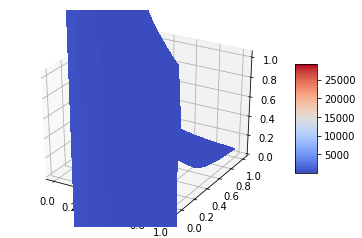

[[7.14285714e+04 1.33314623e+03 6.72852185e+02 4.49981053e+02
  3.38018146e+02 2.70670693e+02 2.25701456e+02 1.93545758e+02
  1.69409919e+02 1.50626288e+02 1.35592253e+02 1.23286960e+02
  1.13029304e+02 1.04347444e+02 9.69041669e+01 9.04520699e+01
  8.48055275e+01 7.98225419e+01 7.53926369e+01 7.14285714e+01]
 [1.33314623e+03 2.48819040e+01 1.25581449e+01 8.39846760e+00
  6.30878662e+00 5.05181059e+00 4.21250262e+00 3.61234716e+00
  3.16187471e+00 2.81129615e+00 2.53070020e+00 2.30103364e+00
  2.10958427e+00 1.94754562e+00 1.80862394e+00 1.68820170e+00
  1.58281436e+00 1.48981169e+00 1.40713173e+00 1.33314623e+00]
 [6.72852185e+02 1.25581449e+01 6.33822088e+00 4.23879029e+00
  3.18410748e+00 2.54969915e+00 2.12609205e+00 1.82318761e+00
  1.59582967e+00 1.41888918e+00 1.27726961e+00 1.16135461e+00
  1.06472820e+00 9.82945680e-01 9.12830526e-01 8.52052220e-01
  7.98862183e-01 7.51922804e-01 7.10193407e-01 6.72852185e-01]
 [4.49981053e+02 8.39846760e+00 4.23879029e+00 2.83476128e+00
  2.1

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

RhoS=RhoFromBsPsi()
print RhoS
## This looks really bad but similar to what it is supposed to. I am keeping the Matlab figure. 



In [5]:

N=15
m=50
Psi=1
Corr=0.6
Bn=-1
Bs=1
T=150
Alpha=80

def LongTermTrial(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    MeanGenArr=[]
    MeanPhenArr=[]
    CovArr=[]
    Types=[]
    Genotypes=GenerateIndividuals(N,m, Corr)
    xx=np.reshape(Genotypes,(m*N, 2))
    C=np.cov(np.transpose(xx),ddof=0)
    CovArr.append(C)
    Types.append(len(np.unique(Genotypes[:,:,1])))



    MeanGen=np.mean(np.mean(Genotypes,0),0)
    MeanGenArr.append(MeanGen)
    Phenotypes=CalcPhenotypes(Genotypes.copy(), Psi, m, N)
    MeanPhen=np.mean(np.mean(Phenotypes,0),0)
    MeanPhenArr.append(MeanPhen)
    
    #Corr.append
    for i in range(T):
        NewGenotypes=OneSelRound(Genotypes.copy(),Corr,Bs, Bn, Psi, m, N, T ,Alpha)
        MeanGen=np.mean(np.mean(NewGenotypes,0),0)
        MeanGenArr.append(MeanGen)
        Genotypes=NewGenotypes.copy()
        Phenotypes=CalcPhenotypes(Genotypes.copy(), Psi, m, N)
        MeanPhen=np.mean(np.mean(Phenotypes,0),0)
        MeanPhenArr.append(MeanPhen)
        xx=np.reshape(Genotypes,(m*N, 2))
        C=np.cov(np.transpose(xx),ddof=0)
        CovArr.append(C)
        Types.append(len(np.unique(Genotypes[:,:,1])))


    #[EvolGenotypes, RespToSel, Genotypes]=RunSelectionRounds(Genotypes,Bs, Bn, Psi, m, N, T)
    MeanGenArr=np.asarray(MeanGenArr)
    #plt.plot(MeanGenArr)
    #plt.legend(['sig','alt'])
    #plt.title('Mean genotypes')
    #plt.show()
    #MeanPhenArr=np.asarray(MeanPhenArr)
    #plt.plot(MeanPhenArr)
    #plt.title('Mean Phenotypes')
    #plt.legend(['sig','alt'])

    #plt.show()
    #print MeanGenArr
    #print Genotypes
    #print 'done'
    return MeanGenArr, MeanPhenArr, CovArr, Types

def OneSelRound(Genotypes, Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    
    Phenotypes=CalcPhenotypes(Genotypes.copy(), Psi, m, N)
    [Fitness, Fitness2]=CalcFitness(Genotypes.copy(), Phenotypes.copy(), Bs, Bn, m , N, Psi,  Alpha)
    Selected=DoSelection(Genotypes.copy(), Fitness.copy())
    [Response, NewGenotypes]=ResponseToSelection(Selected.copy(), Genotypes.copy())
    #MeanGen=np.mean(NewGenotypes,0)
    NewGenotypes=MakeGroups(NewGenotypes.copy(), m, N)
    return NewGenotypes



def ManyLongTerm(Corr,Bs, Bn, Psi, m, N, T ,Alpha):
    GenEvol=[]
    PhenEvol=[]
    CovEvol=[]
    TypeEvol=[]
    for i in range(20):
        print i
        [MeanGenArr, MeanPhenArr, CovM, Types]=LongTermTrial(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
        PhenEvol.append(MeanPhenArr)
        GenEvol.append(MeanGenArr)
        CovEvol.append(CovM)
        TypeEvol.append(Types)
    GenEvol=np.asarray(GenEvol)
    PhenEvol=np.asarray(PhenEvol)
    TypeEvol=np.asarray(TypeEvol)
    return GenEvol, PhenEvol, CovEvol, TypeEvol
    
        


#[MeanGenArr, MeanPhenArr, CovArr]=LongTermTrial(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
#print np.shape(CovArr)
#CovArr=np.asarray(CovArr)
#print CovArr[:,1,1]
#plt.plot(CovArr[:,0,0],'b')
#plt.plot(CovArr[:,1,1],'r')
#plt.plot(CovArr[:,0,1]/np.sqrt(CovArr[:,1,1]*CovArr[:,0,0]),'g')
#print (CovArr[:,0,1]/np.sqrt(CovArr[:,1,1]*CovArr[:,0,0]))
#print Corr
#plt.show()

[[[ 0.37417954  0.37417954]
  [-0.02597278 -0.02597278]
  [-0.36527521 -0.36527521]
  ...
  [ 0.02792102  0.02792102]
  [-0.58166448 -0.58166448]
  [-0.82906727 -0.82906728]]

 [[ 0.23246312  0.23246311]
  [ 0.44075704  0.44075704]
  [ 0.60007372  0.60007372]
  ...
  [-0.1312701  -0.1312701 ]
  [-0.08115371 -0.08115372]
  [ 0.06871568  0.06871568]]

 [[ 0.30035371  0.30035371]
  [ 0.1608967   0.1608967 ]
  [ 0.10474238  0.10474238]
  ...
  [-0.04493055 -0.04493055]
  [-0.05596694 -0.05596693]
  [ 0.84464948  0.84464948]]

 ...

 [[-0.71607989 -0.71607989]
  [ 0.23019982  0.23019981]
  [ 0.29484649  0.29484648]
  ...
  [-0.34482115 -0.34482114]
  [-0.13551891 -0.13551891]
  [-0.79039605 -0.79039605]]

 [[-0.95167543 -0.95167543]
  [-0.35151581 -0.35151581]
  [-0.17850497 -0.17850496]
  ...
  [ 0.71136833  0.71136833]
  [ 0.20967417  0.20967417]
  [ 0.16574023  0.16574022]]

 [[-0.0325834  -0.03258339]
  [ 0.04956282  0.04956283]
  [ 0.64940486  0.64940485]
  ...
  [ 0.23778772  0.237787

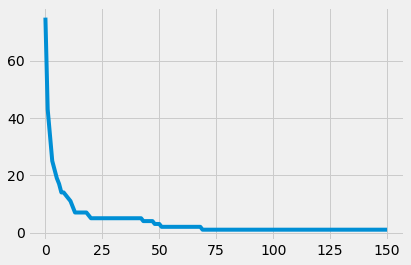

In [128]:
N=15
m=5
Psi=0.3
Corr=0.3
Bn=-1
Bs=1
T=150
Alpha=80
[MeanGenArr, MeanPhenArr, CovM, Types]=LongTermTrial(Corr,Bs, Bn, Psi, m, N, T ,Alpha)
print Gen
print ('meanGen', MeanGenArr)
print 'phenotypes'
print Phen
print ('meanPhen', MeanPhenArr)
plt.plot(Types)

In [204]:
N=15
m=50
Psi=0.1
Corr=0.9
Bn=-1
Bs=1
T=500
Alpha=80
ParSet=10
[GenEvol, PhenEvol, CovEvol, TypeEvol]=ManyLongTerm(Corr,Bs, Bn, Psi, m, N, T ,Alpha)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


(20, 501, 2)


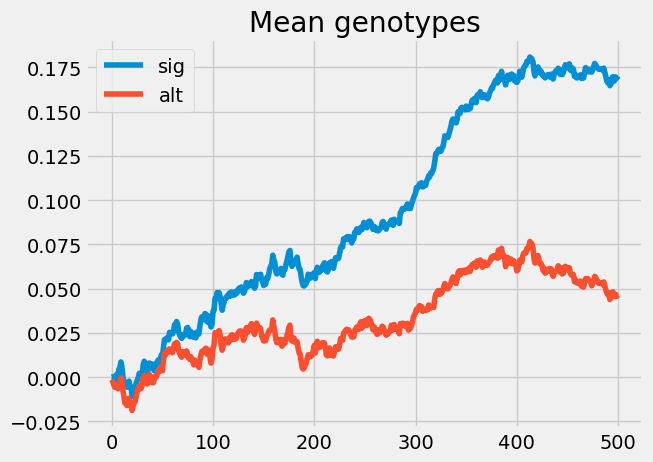

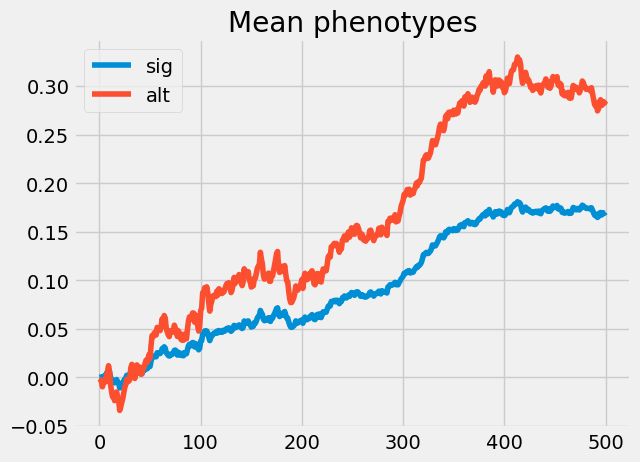

(20, 501, 2, 2)


In [205]:
print np.shape(GenEvol)
MyMeanGen=np.mean(GenEvol,0)
MySTDGen=np.std(GenEvol,0)
#print MyMeanGen
#x = np.linspace(0, 151, 151)
plt.plot(MyMeanGen)
plt.legend(['sig','alt'])
plt.title('Mean genotypes')
plt.show()

MyMeanPhen=np.mean(PhenEvol,0)
MySTDPhen=np.std(PhenEvol,0)
#print MyMeanGen
plt.plot(MyMeanPhen)
plt.legend(['sig','alt'])
plt.title('Mean phenotypes')
plt.show()

print np.shape(CovEvol)

(501, 2, 2)


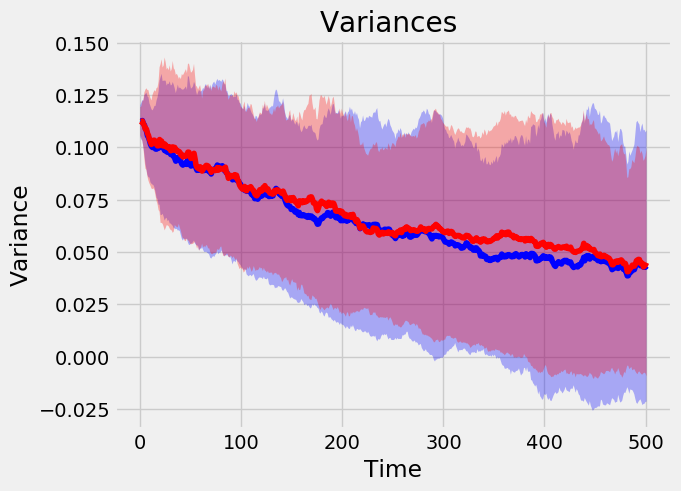

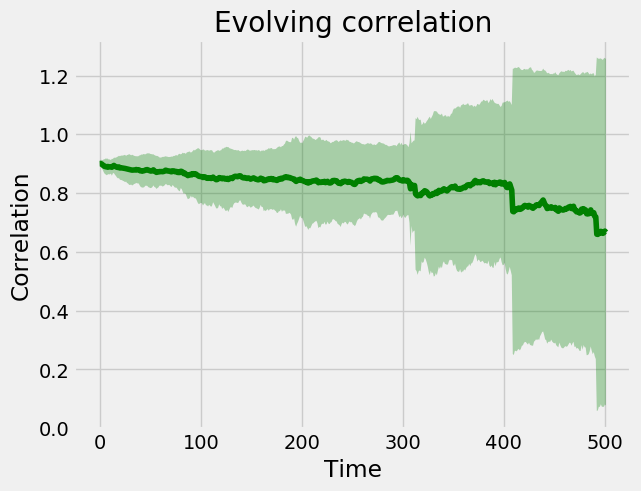

(20, 501)


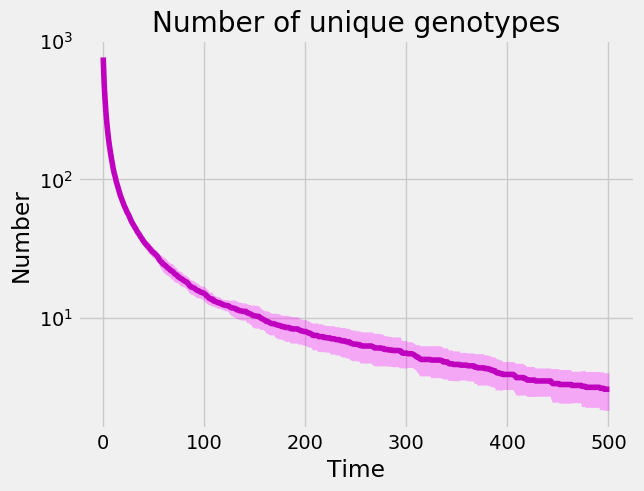

In [206]:
def FindCorrelation(CovEvol):
    CovEvol=np.asarray(CovEvol)
    CEShape= np.shape(CovEvol)
    TC=[]
    TCS=[]
    for i in range(CEShape[1]):
        ParC=[]
        for j in range(CEShape[0]):
            ThicCVM=CovEvol[j,i,:,:]
            ThisCorr=CovEvol[j,i,1,0]/np.sqrt(CovEvol[j,i,1,1]*CovEvol[j,i,0,0])
            ParC.append(ThisCorr)
        ParC=np.asarray(ParC)
        TC.append(np.mean(ParC))
        TCS.append(np.std(ParC))
    TC=np.asarray(TC)
    TCS=np.asarray(TCS)
    return TC, TCS



#font = {'family' : 'sans-serif','size'   : 14}
#plt.tick_params(axis='both', which='major', labelsize=18) 
plt.style.use('fivethirtyeight')

[TC, TCS]=FindCorrelation(CovEvol)
MeanCovEvol=np.mean(CovEvol,0)
STDCovEvol=np.std(CovEvol,0)
print np.shape(MeanCovEvol)

x = np.linspace(0, 501, 501)
Var1 = MeanCovEvol[:,0,0]
Var1STD = STDCovEvol[:,0,0]
plt.plot(x, Var1, 'b-')
plt.fill_between(x, Var1-Var1STD, Var1+Var1STD, facecolor='blue', alpha=0.3)
plt.title('Variances ')
plt.ylabel('Variance')
plt.xlabel('Time')

##plt.legend(['sig','STD'])

Var2 = MeanCovEvol[:,1,1]
Var2STD = STDCovEvol[:,1,1]
plt.plot(x, Var2, 'r-')
plt.fill_between(x, Var2-Var2STD, Var2+Var2STD, facecolor='red', alpha=0.3)
plt.savefig('GBParSet'+ str(ParSet)+'Variances.png', bbox_inches='tight')
#plt.title('Variance of alt trait')
plt.show()

CorrCoef=MeanCovEvol[:,0,1]/np.sqrt(MeanCovEvol[:,1,1]*MeanCovEvol[:,0,0])

#plt.plot(x, CorrCoef, 'g-')
plt.plot(x, TC, 'g-')
plt.fill_between(x, TC-TCS, TC+TCS, facecolor='green', alpha=0.3)

plt.title('Evolving correlation')
plt.ylabel('Correlation')
plt.xlabel('Time')

plt.savefig('GBParSet'+ str(ParSet)+'Correlation.png', bbox_inches='tight')


#plt.savefig('GBLong500T15N50mC06Correlation.png', bbox_inches='tight')


plt.show()
print np.shape(TypeEvol)
MT=np.mean(TypeEvol,0)
MTSTD=np.std(TypeEvol,0)
plt.semilogy(x, MT, 'm-')
plt.fill_between(x, MT-MTSTD, MT+MTSTD, facecolor='magenta', alpha=0.3)

plt.title('Number of unique genotypes')
plt.ylabel('Number')
plt.xlabel('Time')

plt.savefig('GBParSet'+ str(ParSet)+'UniqueG.png', bbox_inches='tight')
plt.show()




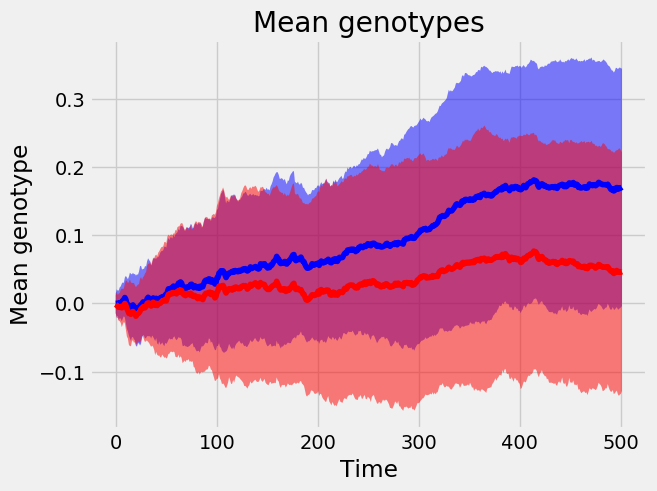

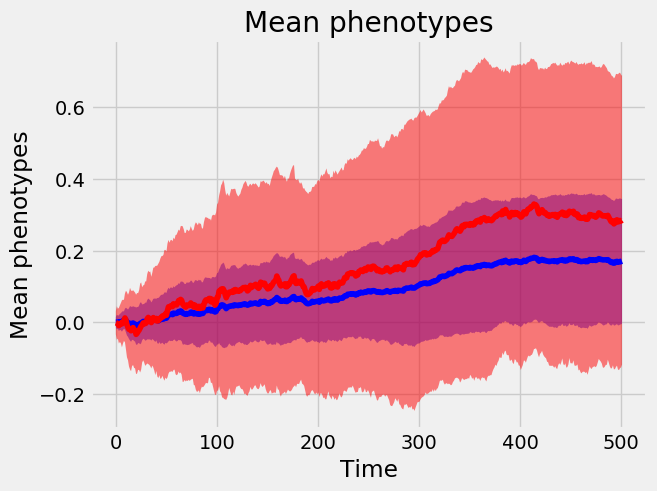

In [207]:

x = np.linspace(0, 501, 501)

y = MyMeanGen[:,0]
error = MySTDGen[:,0]
#y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'b-')
plt.fill_between(x, y-error, y+error, facecolor='blue', alpha=0.5)
#plt.legend(['sig','STD'])
#plt.show()


y = MyMeanGen[:,1]
error = MySTDGen[:,1]
#y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'r-')
plt.fill_between(x, y-error, y+error, facecolor='red', alpha=0.5)
#plt.legend(['Alt','STD'])
plt.title('Mean genotypes')
plt.ylabel('Mean genotype')
plt.xlabel('Time')

plt.savefig('GBParSet'+ str(ParSet)+'Genotypes.png', bbox_inches='tight')
#plt.savefig('GBLong500T15N50mC06.png', bbox_inches='tight')

plt.show()



y = MyMeanPhen[:,0]
error = MySTDPhen[:,0]
#y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'b-')
plt.fill_between(x, y-error, y+error, facecolor='blue', alpha=0.5)
#plt.legend(['sig','STD'])
#plt.show()


y = MyMeanPhen[:,1]
error = MySTDPhen[:,1]
#y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'r-')
plt.fill_between(x, y-error, y+error, facecolor='red', alpha=0.5)
#plt.legend(['Alt','STD'])
plt.title('Mean phenotypes')
plt.ylabel('Mean phenotypes')
plt.xlabel('Time')
plt.savefig('GBParSet'+ str(ParSet)+'Phenotypes.png', bbox_inches='tight')
#plt.savefig('GBLong500T15N50mC06Phen.png', bbox_inches='tight')
plt.savefig('Test' + str(10) + '.png', bbox_inches='tight')
plt.show()


In [108]:
print(plt.style.available)

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


In [123]:
a = np.array([[1, 2], [3, 4]])
print np.var(a)
print np.cov(a)
xx=[1,2,3]
print np.var(xx)
yy=[2,4,6]
print np.var(yy)
print np.cov(xx, yy)
print np.cov(xx, yy,ddof=0)

1.25
[[0.5 0.5]
 [0.5 0.5]]
0.6666666666666666
2.6666666666666665
[[1. 2.]
 [2. 4.]]
[[0.66666667 1.33333333]
 [1.33333333 2.66666667]]


In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
N=5
m=2
Psi=1.0/N
Corr=0.5
Bn=1
Bs=1
T=120
Alpha=2*N
Genotypes=GenerateIndividuals(N,m, Corr)
print Genotypes
AllG=np.reshape(Genotypes,(m*N, 2))
print AllG
print np.cov(AllG[:,0], AllG[:,1], ddof=0)
#TheoreticalResponse(Corr,Bs, Bn, Psi, N, Alpha)
print np.var(AllG[:,0])


[[[-0.41992578 -0.68860445]
  [ 0.41655054  0.272174  ]
  [-0.00462724 -0.14189143]
  [ 0.2457828   0.31802806]
  [ 0.32108874  0.09624113]]

 [[ 0.33542684 -0.03633422]
  [-0.16442763 -0.15653931]
  [-0.15338946  0.36215499]
  [-0.3357882  -0.04306261]
  [-0.24069062  0.01783384]]]
[[-0.41992578 -0.68860445]
 [ 0.41655054  0.272174  ]
 [-0.00462724 -0.14189143]
 [ 0.2457828   0.31802806]
 [ 0.32108874  0.09624113]
 [ 0.33542684 -0.03633422]
 [-0.16442763 -0.15653931]
 [-0.15338946  0.36215499]
 [-0.3357882  -0.04306261]
 [-0.24069062  0.01783384]]
[[0.08471422 0.048043  ]
 [0.048043   0.08379456]]
0.084714221391034


[[[ 0.80216871  0.40108436]
  [-1.05550166 -0.52775083]
  [ 1.35975406  0.67987703]
  [ 0.63267475  0.31633738]
  [-0.00774232 -0.00387116]
  [-1.44784501 -0.72392251]
  [-0.3819917  -0.19099585]
  [-0.1737286  -0.0868643 ]
  [ 0.58278327  0.29139164]
  [-0.25467998 -0.12733999]]

 [[ 0.48915296  0.24457648]
  [-0.0915944  -0.0457972 ]
  [ 1.18866949  0.59433474]
  [ 0.72826722  0.36413361]
  [-0.77294262 -0.38647131]
  [-1.57465202 -0.78732601]
  [ 1.7121435   0.85607175]
  [ 0.25392098  0.12696049]
  [-1.17776745 -0.58888372]
  [-0.99200274 -0.49600137]]]


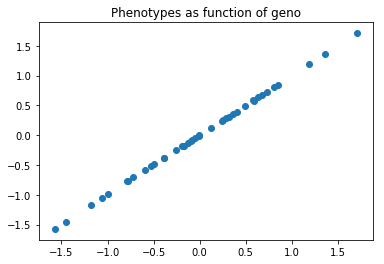

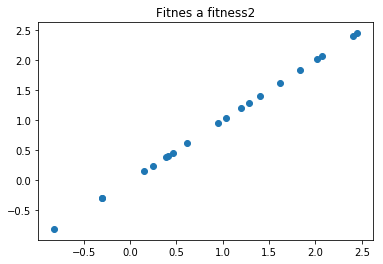

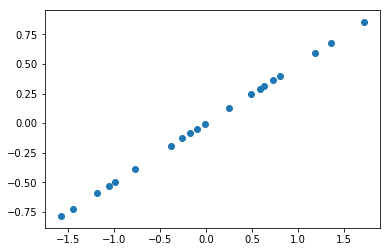

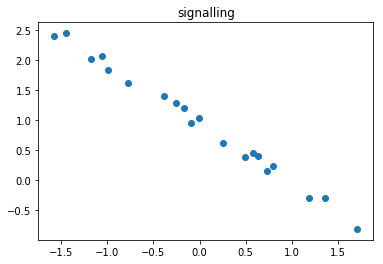

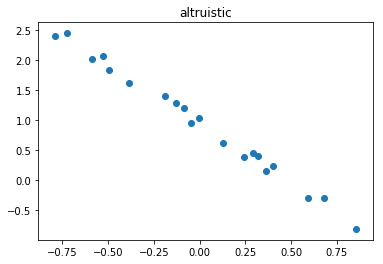

In [44]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
N=10
m=2
Psi=0.1/N

Bn=-1
Bs=1
T=120
Corr=1


Genotypes=GenerateIndividuals(N, m, Corr)
Phenotypes=CalcPhenotypes(Genotypes, Psi, m, N)
plt.scatter(Genotypes, Phenotypes)
plt.title('Phenotypes as function of geno')
plt.show()
[Fitness, Fitness2]=CalcFitness(Genotypes, Phenotypes, Bs, Bn, m , N, Psi)


plt.scatter(Fitness, Fitness2)
plt.title('Fitnes a fitness2')
plt.show()
#print ('genotypes, ', Genotypes)
#print ('Phenotypes, ', Phenotypes)
#print ('fitness, ', Fitness)
#print ('fitness 2 ', Fitness2)


#print Fitness
#print Phenotypes

AllGen=np.reshape(Genotypes,(N*m,2))

#print AllPhen[:,0]
plt.scatter(AllGen[:,0],AllGen[:,1])
plt.show()
plt.scatter(AllGen[:,0],np.reshape(Fitness, (N*m,1)))
plt.title('signalling')
plt.show()
plt.scatter(AllGen[:,1],np.reshape(Fitness, (N*m,1)))
plt.title('altruistic')
plt.show()

#Selected=DoSelection(Genotypes, Fitness)
#[Response, NewGenotypes]=ResponseToSelection(Selected, Genotypes)


In [6]:
##This will simulate evolution, then invasion of cheaters? 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
Psi=1
N=5
m=5
Bn=-1
Bs=1
T=100
Corr=0.7
Alpha=80

Genotypes=GenerateIndividuals(N, m, Corr)

#[MeanGenArr, MeanPhenArr, CovArr, Types]=LongTermTrial(Corr,Bs, Bn, Psi, m, N, T ,Alpha):

[EvolGenotypes, RespToSel, FinGenotypes]=RunSelectionRounds(Genotypes.copy(),Bs, Bn, Psi, m, N, T) 
print Genotypes
print FinGenotypes
print np.shape(FinGenotypes)

[[[ 0.45008834  0.45283503]
  [ 0.27049345  0.23718841]
  [-0.44292635 -0.18716189]
  [ 0.4806722  -0.04228774]
  [ 0.30397673  0.08126171]]

 [[-0.26117659 -0.45448933]
  [-0.05966304 -0.12818668]
  [ 0.05644538  0.12383957]
  [ 0.02965541  0.15059298]
  [-0.43142226 -0.24009647]]

 [[-0.02601659  0.06675969]
  [-0.43699225  0.18412511]
  [ 0.11134845  0.38212382]
  [-0.10980673 -0.10241109]
  [-0.48945171 -0.27671928]]

 [[ 0.17863195  0.13708287]
  [ 0.4564833   0.40229986]
  [-0.18605236 -0.18074489]
  [-0.43885946 -0.41647001]
  [-0.17238898 -0.38890418]]

 [[ 0.34735379  0.28937493]
  [-0.52869561 -0.44226422]
  [-0.44070147 -0.03950452]
  [ 0.33589159 -0.0294885 ]
  [ 0.22644801 -0.16823428]]]
[[[ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]]

 [[ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]
  [ 0.4806722  -0.04228774]]

 [[ 0.

In [2]:
FinGenotypes[0,0,1]=-1
FinGenotypes[0,0,0]=1
#print FinGenotypes
print 'now evoling'
[EvolGenotypes, RespToSel, FinGenotypes2]=RunSelectionRounds(FinGenotypes.copy(),Bs, Bn, Psi, m, N, 100) 
print 'and now'
#print FinGenotypes2

#plt.plot(RespToSel)
#plt.show()
plt.plot(EvolGenotypes)
plt.show()

NameError: name 'FinGenotypes' is not defined

In [4]:
def InvasionTrial(N, m, Corr,Bs, Bn, Psi,T1,T2):
    Genotypes=GenerateIndividuals(N, m, Corr)
    [EvolGenotypes, RespToSel, FinGenotypes]=RunSelectionRounds(Genotypes.copy(),Bs, Bn, Psi, m, N, T1) 
    FinGenotypes[0,0,1]=-1
    FinGenotypes[0,0,0]=1
    #plt.plot(EvolGenotypes)
    #plt.show()
    [EvolGenotypes2, RespToSel2, FinGenotypes2]=RunSelectionRounds(FinGenotypes.copy(),Bs, Bn, Psi, m, N, T2) 
    #print FinGenotypes2

    #plt.plot(RespToSel)
    #plt.show()
    #plt.plot(EvolGenotypes+EvolGenotypes2)
    #plt.show()
    Inv=0
    CheckEG=np.array(EvolGenotypes2[-1])
    if CheckEG[1]==-1:
        Inv=1
        print 'Invasion!!!'
    return Inv
    
    
    
    
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Psi=1
N=10
m=10
Bn=-1
Bs=1
T1=500
T2=500
Corr=0.45
Invs=0
Alpha=140
#mrange=[5,10,15,20]
Corrange=[0,0.45,0.9]
IC=[]
for j in range(len(Corrange)):
    Invs=0
    Corr=Corrange[j]
    print Corr
    
    for i in range(200):
        #print i
        #I=InvasionTrial(N, m, Corr,Bs, Bn, Psi,T1,T2)
        Invs=Invs+InvasionTrial(N, m, Corr,Bs, Bn, Psi,T1,T2)
    
    #print ('For correlation', Corr, 'there were', Invs, 'invasions')
    print ('For corr', Corr, 'there were', Invs, 'invasions')
    IC.append(Invs)
print Corrange
print np.array(IC)/200.0



0
Invasion!!!


KeyboardInterrupt: 

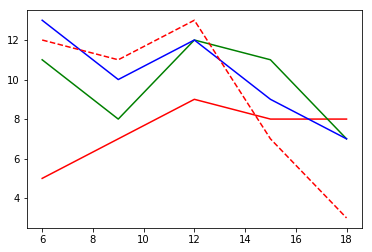

In [5]:
XX=[6,9,12,15,18]
I1=[5, 7, 9, 8, 8 ]
I2= [11, 8, 12, 11, 7]
I3= [13, 10, 12, 9, 7] 

I4=[12, 11, 13, 7, 3]
plt.plot(XX, I1,'r')
plt.plot(XX, I2,'g')

plt.plot(XX, I3,'b')

plt.plot(XX, I4,'--r')






In [7]:
NRange=np.array([4, 6, 8, 10, 12, 14, 16, 18, 20])
Invs00=np.array([14, 11, 13, 14, 10, 12, 14, 7, 6])/200.0
Invs09=np.array([9, 20, 21, 11, 16, 11, 14, 13, 4])/200.0
Invs045=np.array([14, 11, 24, 16, 13, 8, 13, 15, 7])/200.0




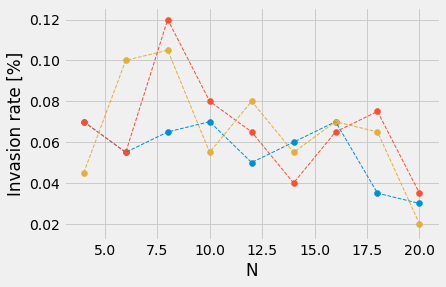

0.05611111111111111
0.06611111111111112
0.06722222222222224


In [28]:
plt.style.use('fivethirtyeight')

plt.scatter(NRange, Invs00)
plt.scatter(NRange, Invs045)
plt.scatter(NRange, Invs09)
plt.plot(NRange, Invs00,'--',linewidth=1.0 )

plt.plot(NRange, Invs045,'--',linewidth=1.0 )

plt.plot(NRange, Invs09,'--',linewidth=1.0 )



plt.xlabel('N')
plt.ylabel('Invasion rate [%]')
plt.savefig('GBInvasionsN.png', bbox_inches='tight')
plt.show()


print np.mean(Invs00)
print np.mean(Invs09)

print np.mean(Invs045)

